#  MNIST 훼손된 이미지 학습 : 


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #

In [2]:
import numpy as np

train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')

test_images=np.load('test_images.npy')
test_labels=np.load('test_labels.npy')

In [3]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


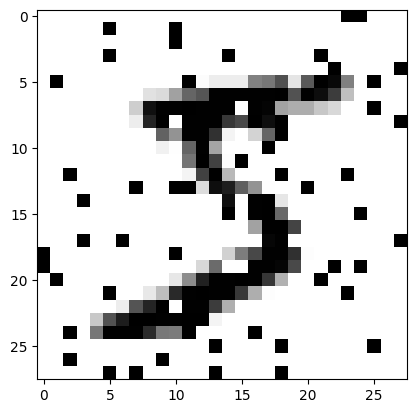

5


In [4]:
i=0

import matplotlib.pyplot as plt

plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()
print(train_labels[i])

## 데이터를 학습에 맞도록 크기를 변환
1. 각 픽셀의 크기를 $0\le f \le 255$ 에서 $0\le f \le 1$로 크기를 조정해 준다.
2. label을 one-hot encoding 을 시켜준다. (해당값을 1로, 그 나머지를 0으로 변환)

In [6]:
from tensorflow.keras.utils import to_categorical
 
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [9]:
# 네트워크 구성을 아래에 작성하세요. (각 은닉층의 활성화 함수는 ReLu으로 설정)
from tensorflow.keras import models
from tensorflow.keras import layers

model_DNN=models.Sequential()
model_DNN.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴
model_DNN.add(layers.Dense(150,activation='relu'))
model_DNN.add(layers.Dense(100,activation='relu'))
model_DNN.add(layers.Dense(50, activation='relu'))
model_DNN.add(layers.Dense(20, activation='relu'))
model_DNN.add(layers.Dense(10, activation='softmax'))
model_DNN.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 139,130
Trainable params: 139,130
Non-trai

In [10]:
# 위 Q2에서 구성한 네트워크 학습
from keras import optimizers

ADAM = optimizers.Adam(learning_rate=0.0006)
model_DNN.compile(optimizer='ADAM',loss='categorical_crossentropy',metrics=['accuracy'])
history= model_DNN.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2,validation_data=(test_images, test_labels))


Epoch 1/20
600/600 - 2s - loss: 0.5028 - accuracy: 0.8395 - val_loss: 0.2631 - val_accuracy: 0.9166 - 2s/epoch - 3ms/step
Epoch 2/20
600/600 - 1s - loss: 0.2114 - accuracy: 0.9347 - val_loss: 0.2365 - val_accuracy: 0.9248 - 1s/epoch - 2ms/step
Epoch 3/20
600/600 - 1s - loss: 0.1332 - accuracy: 0.9593 - val_loss: 0.1970 - val_accuracy: 0.9392 - 1s/epoch - 2ms/step
Epoch 4/20
600/600 - 1s - loss: 0.0860 - accuracy: 0.9726 - val_loss: 0.2178 - val_accuracy: 0.9359 - 1s/epoch - 2ms/step
Epoch 5/20
600/600 - 1s - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.2228 - val_accuracy: 0.9395 - 1s/epoch - 2ms/step
Epoch 6/20
600/600 - 1s - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.2561 - val_accuracy: 0.9372 - 1s/epoch - 2ms/step
Epoch 7/20
600/600 - 1s - loss: 0.0303 - accuracy: 0.9899 - val_loss: 0.2758 - val_accuracy: 0.9370 - 1s/epoch - 2ms/step
Epoch 8/20
600/600 - 1s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.2759 - val_accuracy: 0.9365 - 1s/epoch - 2ms/step
Epoch 9/20
600/600 - 1s 

In [11]:
test_loss, test_acc = model_DNN.evaluate(test_images, test_labels)
print('test accuracy=',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.9380
test accuracy= 0.9380000233650208


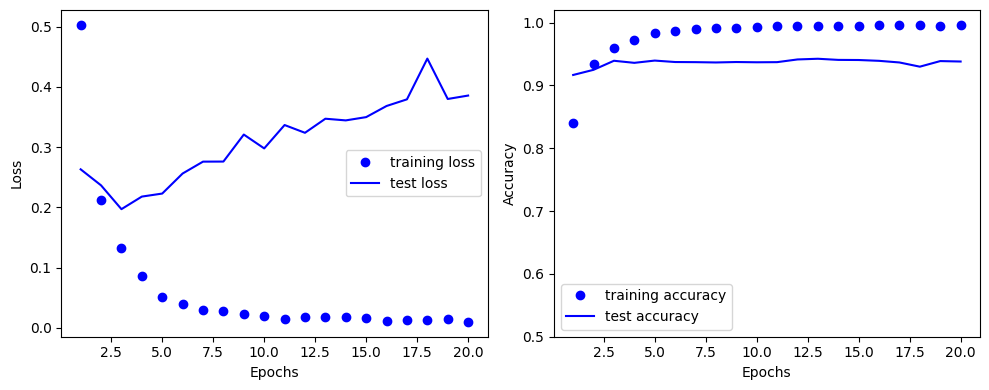

In [12]:
import matplotlib.pyplot as plt

history_dict= history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(10, 4))
plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.subplot(122)

plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.5,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

## 위 결과에서 오버피팅 줄이기

In [13]:
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')

test_images=np.load('test_images.npy')
test_labels=np.load('test_labels.npy')

In [14]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
from keras.layers import BatchNormalization, Dropout

model_DNN2=models.Sequential()
model_DNN2.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴

model_DNN2.add(layers.Dense(150))
model_DNN2.add(BatchNormalization())
model_DNN2.add(layers.Activation('relu'))
model_DNN2.add(Dropout(0.3))

model_DNN2.add(layers.Dense(100))
model_DNN2.add(BatchNormalization())
model_DNN2.add(layers.Activation('relu'))
model_DNN2.add(Dropout(0.2))

model_DNN2.add(layers.Dense(50))
model_DNN2.add(BatchNormalization())
model_DNN2.add(layers.Activation('relu'))
model_DNN2.add(Dropout(0.1))

model_DNN2.add(layers.Dense(25))
model_DNN2.add(BatchNormalization())
model_DNN2.add(layers.Activation('relu'))


model_DNN2.add(layers.Dense(10, activation='softmax'))
model_DNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 150)               117750    
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               15100     
                                                      

In [16]:
ADAM = optimizers.Adam(learning_rate=0.0001)
model_DNN2.compile(optimizer='ADAM',loss='categorical_crossentropy',metrics=['accuracy'])
history2= model_DNN2.fit(train_images,train_labels,epochs=30, batch_size=100, verbose=2,validation_data=(test_images, test_labels))

Epoch 1/30
600/600 - 3s - loss: 0.8172 - accuracy: 0.7516 - val_loss: 0.3141 - val_accuracy: 0.9043 - 3s/epoch - 5ms/step
Epoch 2/30
600/600 - 2s - loss: 0.3865 - accuracy: 0.8810 - val_loss: 0.2428 - val_accuracy: 0.9248 - 2s/epoch - 3ms/step
Epoch 3/30
600/600 - 2s - loss: 0.3055 - accuracy: 0.9057 - val_loss: 0.2096 - val_accuracy: 0.9361 - 2s/epoch - 3ms/step
Epoch 4/30
600/600 - 2s - loss: 0.2605 - accuracy: 0.9186 - val_loss: 0.1968 - val_accuracy: 0.9408 - 2s/epoch - 3ms/step
Epoch 5/30
600/600 - 2s - loss: 0.2270 - accuracy: 0.9295 - val_loss: 0.1799 - val_accuracy: 0.9458 - 2s/epoch - 3ms/step
Epoch 6/30
600/600 - 2s - loss: 0.2008 - accuracy: 0.9366 - val_loss: 0.1767 - val_accuracy: 0.9472 - 2s/epoch - 3ms/step
Epoch 7/30
600/600 - 2s - loss: 0.1759 - accuracy: 0.9443 - val_loss: 0.1736 - val_accuracy: 0.9489 - 2s/epoch - 3ms/step
Epoch 8/30
600/600 - 2s - loss: 0.1661 - accuracy: 0.9476 - val_loss: 0.1671 - val_accuracy: 0.9512 - 2s/epoch - 3ms/step
Epoch 9/30
600/600 - 2s 

In [17]:
test_loss2, test_acc2 = model_DNN2.evaluate(test_images, test_labels)
print('test accuracy=',test_acc2)

313/313 [==============================] - 1s 1ms/step - loss: 0.1923 - accuracy: 0.9528
test accuracy= 0.9527999758720398


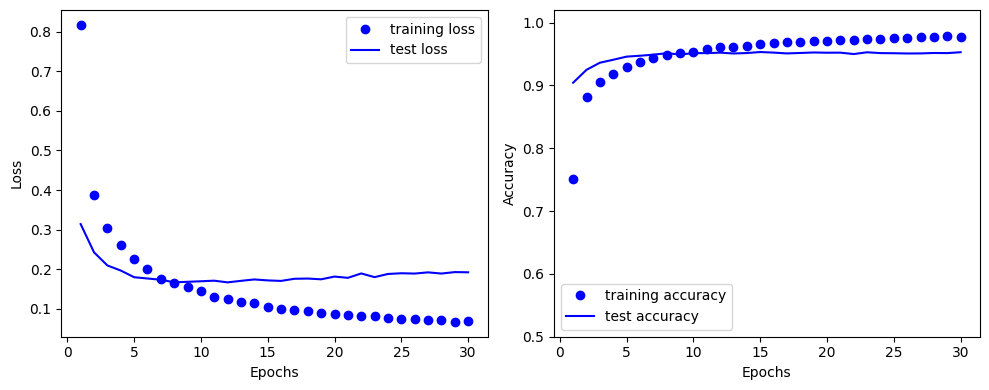

In [18]:
import matplotlib.pyplot as plt

history_dict2= history2.history

loss = history_dict2['loss']
val_loss = history_dict2['val_loss']
accuracy = history_dict2['accuracy']
val_accuracy = history_dict2['val_accuracy']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(10, 4))
plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.subplot(122)

plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.5,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')

test_images=np.load('test_images.npy')
test_labels=np.load('test_labels.npy')

In [20]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
model_CNN1=models.Sequential()
model_CNN1.add(layers.Conv2D(filters = 16, kernel_size=(5, 5),  padding = "same", activation='relu', input_shape=(28, 28, 1)))
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_CNN1.add(layers.Conv2D(32, kernel_size=(5, 5), padding = "same", activation='relu'))
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_CNN1.add(layers.Conv2D(64, kernel_size=(5, 5), padding = "same", activation='relu'))
model_CNN1.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_CNN1.add(layers.Conv2D(128, kernel_size=(5, 5), padding = "same", activation='relu'))

model_CNN1.add(layers.Flatten())
model_CNN1.add(layers.Dense(84, activation='relu'))

model_CNN1.add(layers.Dense(10, activation='softmax'))

model_CNN1.summary()

ADAM = optimizers.Adam(learning_rate=0.0001)
model_CNN1.compile(optimizer= 'ADAM',loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN1= model_CNN1.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2,validation_data=(test_images, test_labels))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

In [22]:
test_loss, test_acc = model_CNN1.evaluate(test_images, test_labels)

print('test accuracy=',test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9841
test accuracy= 0.9840999841690063


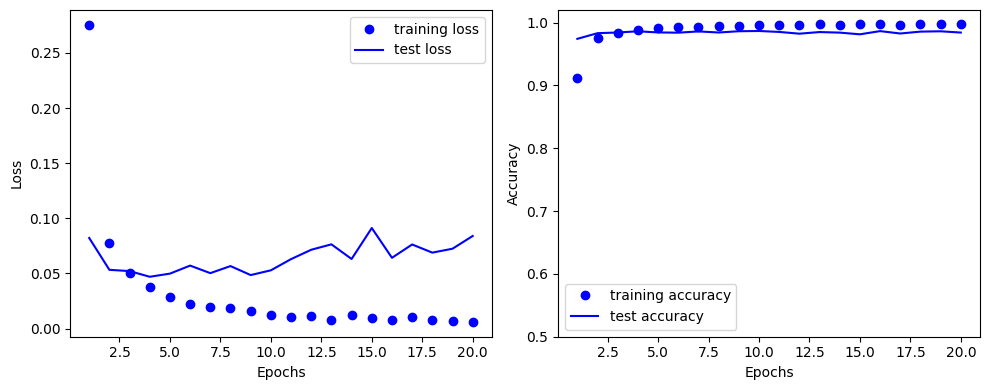

In [23]:
import matplotlib.pyplot as plt


history_dict= history_CNN1.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 4))

plt.subplot(121)


plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)


plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.5,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

## 위 그림에서 오버피팅 최소화 

In [24]:
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')

test_images=np.load('test_images.npy')
test_labels=np.load('test_labels.npy')

In [25]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [26]:
from keras.layers import BatchNormalization, Dropout

model_CNN2=models.Sequential()
model_CNN2.add(layers.Conv2D(16, (3, 3),padding = 'same',input_shape=(28, 28, 1)))
model_CNN2.add(BatchNormalization())
model_CNN2.add(layers.Activation('relu'))
model_CNN2.add(layers.Conv2D(16, (3, 3),padding = 'same'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(layers.Activation('relu'))
model_CNN2.add(Dropout(0.2))
model_CNN2.add(layers.MaxPooling2D((2, 2)))

model_CNN2.add(layers.Conv2D(32, (3, 3),padding = 'same'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(layers.Activation('relu'))
model_CNN2.add(layers.Conv2D(32, (3, 3),padding = 'same'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(layers.Activation('relu'))
model_CNN2.add(Dropout(0.2))
model_CNN2.add(layers.MaxPooling2D((2, 2)))

model_CNN2.add(layers.Conv2D(64, (3, 3),padding = 'same'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(layers.Activation('relu'))
model_CNN2.add(layers.Conv2D(64, (3, 3),padding = 'same'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(layers.Activation('relu'))
model_CNN2.add(Dropout(0.2))
model_CNN2.add(layers.MaxPooling2D((2, 2)))

model_CNN2.add(layers.Flatten())
model_CNN2.add(layers.Dense(84, activation='relu'))
model_CNN2.add(Dropout(0.4))
model_CNN2.add(layers.Dense(10, activation='softmax'))

model_CNN2.summary()

ADAM = optimizers.Adam(learning_rate=0.0001)
model_CNN2.compile(optimizer= 'ADAM',loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN2= model_CNN2.fit(train_images,train_labels,epochs=20, batch_size=100, verbose=2,validation_data=(test_images, test_labels))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 16)       

In [27]:
test_loss, test_acc = model_CNN2.evaluate(test_images, test_labels)

print('test accuracy=',test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0402 - accuracy: 0.9888
test accuracy= 0.9887999892234802


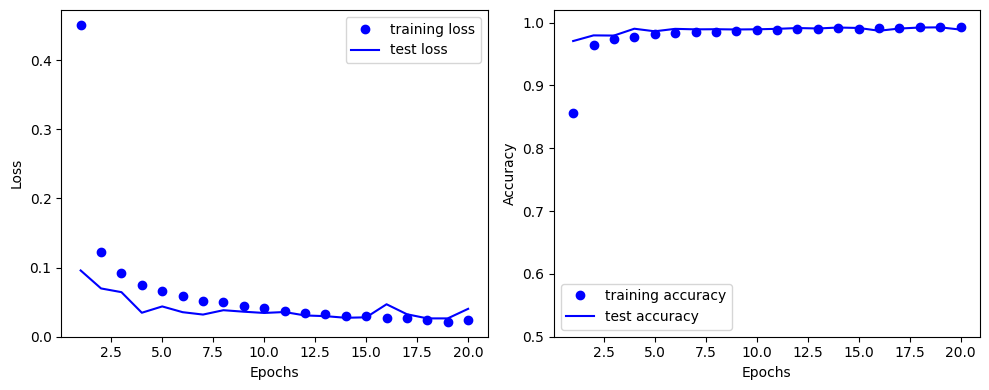

In [28]:
import matplotlib.pyplot as plt


history_dict= history_CNN2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 4))

plt.subplot(121)


plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)


plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.5,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()